### Homework: 7
### Name: Daniel Jang
### GitHub: hjang8659
### USC ID: 6894-6426-04
### Due: Apr 5, 2024

In [1]:
import pandas as pd
import numpy as np
import math
import re
import os
import glob
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import statsmodels.api as sm
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, train_test_split, StratifiedKFold, cross_validate, KFold, GridSearchCV, cross_val_predict, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV, Ridge, LassoCV, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric, KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from scipy.linalg import pinv
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.utils import resample
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import _tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, hamming_loss, mean_squared_error, calinski_harabasz_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning

### 1
### (a)

In [2]:
data = pd.read_csv('../data/Frogs_MFCCs.csv')
train_size = int(len(data) * 0.7)
train_data = data.sample(n=train_size, random_state=42)

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

train_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens,37


### (b)
### i.
### Exact Match Ratio: Quantifies the proportion of instances where all predicted labels precisely correspond to the true labels. It evaluates the accuracy of the entire predicted label set for each individual instance.
### Hamming Loss: Assesses the ratio of incorrectly predicted labels. It computes the average fraction of misclassified labels across all instances.
### Result shows that the classifier performs well in terms of both Hamming Loss for each label and high exact Match Ratio.
### ii.

In [3]:
labels_list = ['Family','Genus','Species']
X_full = data.drop(labels_list, axis=1)
y_full = data[labels_list]

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

gaussianSVC_classifiers = {}
gaussianSVC_param_grid = {label: {'C': np.logspace(-1, 1, 11), 'gamma': np.linspace(0, 1, 15)} for label in labels_list}

print('Gaussian SVC without Standardization:')
for label in labels_list:    
    searcher = GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), gaussianSVC_param_grid[label], cv=10, n_jobs=-1)
    searcher.fit(X_train, y_train[label])
    gaussianSVC_classifiers[label] = searcher
    print('Class:',label,'\n')
    print('The best parameter setting is:')
    print(searcher.best_params_, '\n')

predictY = pd.DataFrame(columns=y_test.columns)
for label in y_test.columns:
    clf = gaussianSVC_classifiers[label]
    test_pred = clf.predict(X_test)
    predictY.loc[:, label] = test_pred

temp = np.array(predictY) != np.array(y_test)
hamming_loss_value = np.sum(temp) / y_test.shape[0] / y_test.shape[1]
exact_ratio = 1 - np.sum(np.all(temp, axis=1)) / y_test.shape[0]

print("Hamming Loss:", hamming_loss_value)
print("Exact Match Ratio:", exact_ratio)

Gaussian SVC without Standardization:
Class: Family 

The best parameter setting is:
{'C': 0.3981071705534973, 'gamma': 0.21428571428571427} 

Class: Genus 

The best parameter setting is:
{'C': 0.251188643150958, 'gamma': 0.2857142857142857} 

Class: Species 

The best parameter setting is:
{'C': 0.15848931924611134, 'gamma': 0.3571428571428571} 

Hamming Loss: 0.0004631773969430292
Exact Match Ratio: 0.999536822603057


### iii.

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

l1_param_grid = {'C': np.logspace(-3, 3, 7)}

l1_svm_classifiers = {}

print('L1-penalized SVM with Linear Kernel:')
for label in labels_list:    
    searcher = GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=30000), l1_param_grid, cv=10, n_jobs=-1)
    searcher.fit(X_train_scaled, y_train[label])
    l1_svm_classifiers[label] = searcher
    print('Class:', label, '\n')
    print('The best parameter setting is:')
    print(searcher.best_params_, '\n')

predictY_l1 = pd.DataFrame(columns=y_test.columns)
for label in y_test.columns:
    clf = l1_svm_classifiers[label]
    test_pred = clf.predict(X_test_scaled)
    predictY_l1.loc[:, label] = test_pred

temp_l1 = np.array(predictY_l1) != np.array(y_test)
hamming_loss_value_l1 = np.sum(temp_l1) / y_test.shape[0] / y_test.shape[1]
exact_ratio_l1 = 1 - np.sum(np.all(temp_l1, axis=1)) / y_test.shape[0]

print("Hamming Loss (L1-penalized SVM with Linear Kernel):", hamming_loss_value_l1)
print("Exact Match Ratio (L1-penalized SVM with Linear Kernel):", exact_ratio_l1)

L1-penalized SVM with Linear Kernel:
Class: Family 

The best parameter setting is:
{'C': 1000.0} 

Class: Genus 

The best parameter setting is:
{'C': 10.0} 

Class: Species 

The best parameter setting is:
{'C': 1.0} 

Hamming Loss (L1-penalized SVM with Linear Kernel): 0.023622047244094488
Exact Match Ratio (L1-penalized SVM with Linear Kernel): 0.9902732746641963


### iv.

In [5]:
smote = SMOTE(random_state=42)

X_train_resampled_dict = {}
y_train_resampled_dict = {}

for label in labels_list:
    X_train_resampled_label, y_train_resampled_label = smote.fit_resample(X_train_scaled, y_train[label])
    X_train_resampled_dict[label] = X_train_resampled_label
    y_train_resampled_dict[label] = y_train_resampled_label

l1_param_grid = {'C': np.logspace(-3, 3, 7)}

l1_svm_classifiers_resampled = {}

print('L1-penalized SVM with Linear Kernel (with SMOTE):')
for label in labels_list:
    warnings.filterwarnings("ignore")
    searcher = GridSearchCV(LinearSVC(penalty='l1', dual=False), l1_param_grid, cv=10, n_jobs=-1)
    searcher.fit(X_train_resampled_dict[label], y_train_resampled_dict[label])
    l1_svm_classifiers_resampled[label] = searcher
    print('Class:', label, '\n')
    print('The best parameter setting is:')
    print(searcher.best_params_, '\n')

predictY_l1_resampled = pd.DataFrame(columns=y_test.columns)
for label in y_test.columns:
    clf = l1_svm_classifiers_resampled[label]
    test_pred = clf.predict(X_test_scaled)
    predictY_l1_resampled.loc[:, label] = test_pred

temp_l1_resampled = np.array(predictY_l1_resampled) != np.array(y_test)
hamming_loss_value_l1_resampled = np.sum(temp_l1_resampled) / y_test.shape[0] / y_test.shape[1]
exact_ratio_l1_resampled = 1 - np.sum(np.all(temp_l1_resampled, axis=1)) / y_test.shape[0]

print("Hamming Loss (L1-penalized SVM with Linear Kernel and SMOTE):", hamming_loss_value_l1_resampled)
print("Exact Match Ratio (L1-penalized SVM with Linear Kernel and SMOTE):", exact_ratio_l1_resampled)

L1-penalized SVM with Linear Kernel (with SMOTE):
Class: Family 

The best parameter setting is:
{'C': 100.0} 

Class: Genus 

The best parameter setting is:
{'C': 100.0} 

Class: Species 

The best parameter setting is:
{'C': 1000.0} 

Hamming Loss (L1-penalized SVM with Linear Kernel and SMOTE): 0.031032885595182955
Exact Match Ratio (L1-penalized SVM with Linear Kernel and SMOTE): 0.9921259842519685


In [7]:
comparison_df = pd.DataFrame({
    'Scenario': ['SVM with Gaussian Kernel', 'L1-penalized SVM with Linear Kernel', 'L1-penalized SVM with Linear Kernel and SMOTE'],
    'Hamming Loss': [hamming_loss_value, hamming_loss_value_l1, hamming_loss_value_l1_resampled],
    'Exact Match Ratio': [exact_ratio, exact_ratio_l1, exact_ratio_l1_resampled]
})
comparison_df

,Scenario,Hamming Loss,Exact Match Ratio
0,SVM with Gaussian Kernel,0.000463,0.999537
1,L1-penalized SVM with Linear Kernel,0.023622,0.990273
2,L1-penalized SVM with Linear Kernel and SMOTE,0.031033,0.992126


### The SVM with Gaussian Kernel without Standardization achieved the lowest Hamming Loss (0.000463) and the highest Exact Match Ratio (0.999537) among the compared scenarios. Therefore, it performed the best in terms of both metrics.
### 2
### (a), (b), (c)

In [8]:
K_range = range(2, 51)
iterations = 50

hamming_dist = []
hamming_loss = []

for iter in range(iterations):
    print('Iteration:', iter+1)
    
    optimalK = min(K_range)
    max_score = 0
    for k in K_range:
        clusterer = KMeans(n_clusters=k, random_state=iter)
        cluster_labels = clusterer.fit_predict(data.iloc[:, :-4])
        silhouette_avg = silhouette_score(data.iloc[:, :-4], cluster_labels)
        if silhouette_avg > max_score:
            optimalK = k
            max_score = silhouette_avg
            
    print('The optimal K is:', optimalK)
    
    clusterer = KMeans(n_clusters=optimalK, random_state=iter)
    cluster_labels = clusterer.fit_predict(data.iloc[:, :-4])
    
    cluster_major = pd.DataFrame(columns=data.iloc[:, -4:-1].columns)
    for c in range(optimalK):
        idx, = np.where(cluster_labels == c)
        cluster_samples = data.iloc[idx, -4:-1]
        row = []
        for label in data.iloc[:, -4:-1].columns:
            cur_major = cluster_samples[label].value_counts().index[0]
            row.append(cur_major)
        cluster_major.loc[c] = row
    
    missclf_labels = 0
    for c in range(len(cluster_major)):
        idx, = np.where(cluster_labels == c)
        for label in data.iloc[idx, -4:-1].values:
            miss = (label != cluster_major.loc[c].values)
            missclf_labels += np.sum(miss)
    hamming_dist.append(missclf_labels / data.iloc[:, -4:-1].shape[0])
    hamming_loss.append(missclf_labels / (data.iloc[:, -4:-1].shape[0] * data.iloc[:, -4:-1].shape[1]))
    
    print('Hamming Distance:', round(missclf_labels / data.iloc[:, -4:-1].shape[0], 4), 
          'Hamming Loss:', round(missclf_labels / (data.iloc[:, -4:-1].shape[0] * data.iloc[:, -4:-1].shape[1]), 4))

average_hamming_distance = np.mean(hamming_dist)
std_dev_hamming_distance = np.std(hamming_dist)

average_hamming_loss = np.mean(hamming_loss)
std_dev_hamming_loss = np.std(hamming_loss)

average_hamming_score = 1 - average_hamming_loss
std_dev_hamming_score = std_dev_hamming_loss

Iteration: 1
The optimal K is: 4
Hamming Distance: 0.6653 Hamming Loss: 0.2218
Iteration: 2
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 3
The optimal K is: 4
Hamming Distance: 0.7358 Hamming Loss: 0.2453
Iteration: 4
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 5
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 6
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 7
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 8
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 9
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 10
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 11
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 12
The optimal K is: 4
Hamming Distance: 0.6673 Hamming Loss: 0.2224
Iteration: 13
The optimal K is: 4
Hamming Distanc

In [11]:
print("The average Hamming Distance is {:.6f}".format(average_hamming_distance))
print("The standard deviation of simulation result is {:.6f}".format(std_dev_hamming_distance), "\n")

print("The average Hamming Loss is {:.6f}".format(average_hamming_loss))
print("The standard deviation of Hamming Loss is {:.6f}".format(std_dev_hamming_loss), "\n")

print("The average Hamming Score is {:.6f}".format(average_hamming_score))
print("The standard deviation of Hamming Score is {:.6f}".format(std_dev_hamming_score))

The average Hamming Distance is 0.671169
The standard deviation of simulation result is 0.031020 

The average Hamming Loss is 0.223723
The standard deviation of Hamming Loss is 0.010340 

The average Hamming Score is 0.776277
The standard deviation of Hamming Score is 0.010340


### 3
### (a)

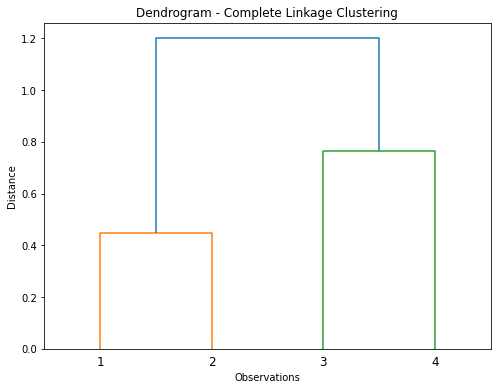

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
warnings.filterwarnings("ignore", message=".*looks suspiciously like an uncondensed distance matrix.*")

dissimilarity_matrix = np.array([[0, 0.3, 0.4, 0.7],
                                 [0.3, 0, 0.5, 0.8],
                                 [0.4, 0.5, 0, 0.45],
                                 [0.7, 0.8, 0.45, 0]])

Z = linkage(dissimilarity_matrix, method='complete')

plt.figure(figsize=(8, 6))
dendrogram(Z, labels=['1', '2', '3', '4'])
plt.title('Dendrogram - Complete Linkage Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show();

### (b)

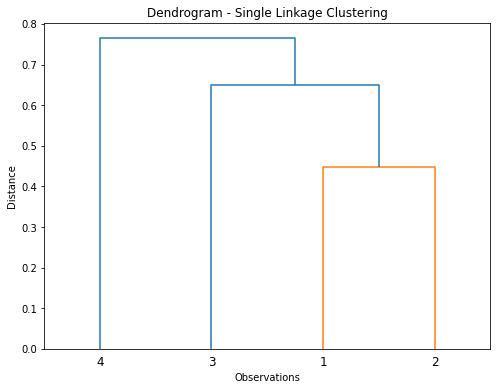

In [13]:
Z_single = linkage(dissimilarity_matrix, method='single')

plt.figure(figsize=(8, 6))
dendrogram(Z_single, labels=['1', '2', '3', '4'])
plt.title('Dendrogram - Single Linkage Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show();

### (c)
### Cluster 1: 1, 2
### Cluster 2: 3, 4
### (d)
### Cluster 1: 1, 2, 3
### Cluster 2: 4
### (e)

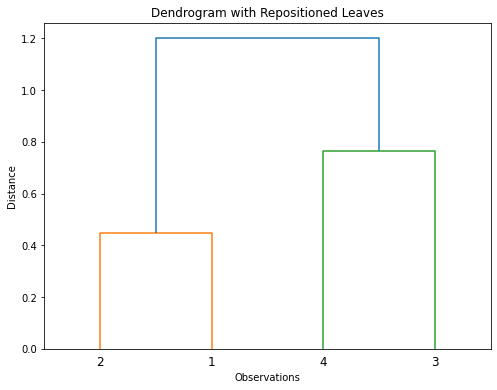

In [14]:
shuffled_labels = ['2', '1', '4', '3']

plt.figure(figsize=(8, 6))
dendrogram(Z, labels=shuffled_labels)
plt.title('Dendrogram with Repositioned Leaves')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show();

### Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

https://chat.openai.com/